In [145]:
# General Packages
import pandas as pd
import numpy as np
import warnings # to ignore known warnings
warnings.simplefilter("ignore")

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px

# Preprocessing
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

# Analysis Helper
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import lime
import lime.lime_tabular

# Anylysis packages
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


## 1. First Data Preprocessing

In [38]:
# import raw dataset
df = pd.read_csv("./data/raw.csv")
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [39]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [40]:
df.describe(include = 'all')

Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top     Research & Development               NaN          NaN  Life Sciences   
freq                       961               NaN          NaN            606   
mean                       NaN          9.192517     2.912925            NaN   
std                        NaN          8.106864     1.024165            NaN   
min                        NaN          1.000000     1.000000            NaN   
25%                        NaN          2.000000     2.000000            NaN   
50%                        NaN          7.000000     3.000000            NaN   
75%                        NaN         14.000000     4.000000            NaN   
max                        NaN         29.000000     5.000000            NaN   

        EmployeeCount  EmployeeNumber  ...  RelationshipSatisfaction  \
count          1470.0     1470.000000  ...               1470.000000   
unique            NaN             NaN  ...                       NaN   
top               NaN             NaN  ...                       NaN   
freq              NaN             NaN  ...                       NaN   
mean              1.0     1024.865306  ...                  2.712245   
std               0.0      602.024335  ...                  1.081209   
min               1.0        1.000000  ...                  1.000000   
25%               1.0      491.250000  ...                  2.000000   
50%               1.0     1020.500000  ...                  3.000000   
75%               1.0     1555.750000  ...                  4.000000   
max               1.0     2068.000000  ...                  4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         1470.0       1470.000000        1470.000000   
unique           NaN               NaN                NaN   
top              NaN               NaN                NaN   
freq             NaN               NaN                NaN   
mean            80.0          0.793878          11.279592   
std              0.0          0.852077           7.780782   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          15.000000   
max             80.0          3.000000          40.000000   

        TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
count             1470.000000     1470.000000     1470.000000   
unique                    NaN             NaN             NaN   
top                       NaN             NaN             NaN   
freq                      NaN             NaN             NaN   
mean                 2.799320        2.761224        7.008163   
std                  1.289271        0.706476        6.126525   
min                  0.000000        1.000000        0.000000   
25%                  2.000000        2.000000        3.000000   
50%                  3.000000        3.000000        5.000000   
75%                  3.000000        3.000000        9.000000   
max      

#### Drop unnecessary columns

containing only one unique value

In [41]:
print("Columns with only one unique value \n")
for c in df.columns:
    if len(df[c].unique()) == 1:
        print(c)
        df.drop(c, inplace=True, axis=1)
df.columns

Columns with only one unique value 

EmployeeCount
Over18
StandardHours


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

containing as many unique values as index counts

In [42]:
print("Columns with unique value in each index \n")
for c in df.columns:
    if len(df[c].unique()) == len(df.index):
        print(c)
        df.drop(c, inplace=True, axis=1)
        
df.columns

Columns with unique value in each index 

EmployeeNumber


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

#### Change Values & Adding new columns based on existing values

Employee Attrition to numerical values

In [43]:
attrition_map = {"Yes": 1, "No": 0}
df["Attrition"] = df["Attrition"].map(attrition_map)
df["Attrition"].unique()

array([1, 0])

OneHotEncoding for catagorical variables

In [44]:
df1 = pd.get_dummies(df,drop_first=True)
df1.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Res

## 2. First Visualization & Data Insights

#### Imbalanced dependent variable
Yes: 237  No: 1233

<AxesSubplot:xlabel='Attrition', ylabel='count'>

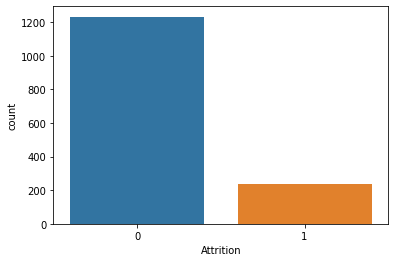

In [45]:
df1.Attrition.value_counts()
sns.countplot(x='Attrition', data=df1)

#### Correlation Matrix
No significant correlation between either of variables and Attrition (Object of our Analysis)
But the variables are in some cases correlating to each other
- Check with the command: corr[(corr > 0.5) & (corr != 1.0)]
- Extract higher auto-correlated varialbles
- Visualize the entire correlation matrix

In [50]:
corr = df1.corr()
corr[((corr > 0.5) | (corr < -0.5)) & (corr != 1.0)]

Age  Attrition  DailyRate  \
Age                                     NaN        NaN        NaN   
Attrition                               NaN        NaN        NaN   
DailyRate                               NaN        NaN        NaN   
DistanceFromHome                        NaN        NaN        NaN   
Education                               NaN        NaN        NaN   
EnvironmentSatisfaction                 NaN        NaN        NaN   
HourlyRate                              NaN        NaN        NaN   
JobInvolvement                          NaN        NaN        NaN   
JobLevel                           0.509604        NaN        NaN   
JobSatisfaction                         NaN        NaN        NaN   
MonthlyIncome                           NaN        NaN        NaN   
MonthlyRate                             NaN        NaN        NaN   
NumCompaniesWorked                      NaN        NaN        NaN   
PercentSalaryHike                       NaN        NaN        NaN   
PerformanceRating                       NaN        NaN        NaN   
RelationshipSatisfaction                NaN        NaN        NaN   
StockOptionLevel                        NaN        NaN        NaN   
TotalWorkingYears                  0.680381        NaN        NaN   
TrainingTimesLastYear                   NaN        NaN        NaN   
WorkLifeBalance                         NaN        NaN        NaN   
YearsAtCompany                          NaN        NaN        NaN   
YearsInCurrentRole                      NaN        NaN        NaN   
YearsSinceLastPromotion                 NaN        NaN        NaN   
YearsWithCurrManager                    NaN        NaN        NaN   
BusinessTravel_Travel_Frequently        NaN        NaN        NaN   
BusinessTravel_Travel_Rarely            NaN        NaN        NaN   
Department_Research & Development       NaN        NaN        NaN   
Department_Sales                        NaN        NaN        NaN   
EducationField_Life Sciences            NaN        NaN        NaN   
EducationField_Marketing                NaN        NaN        NaN   
EducationField_Medical                  NaN        NaN        NaN   
EducationField_Other                    NaN        NaN        NaN   
EducationField_Technical Degree         NaN        NaN        NaN   
Gender_Male                             NaN        NaN        NaN   
JobRole_Human Resources                 NaN        NaN        NaN   
JobRole_Laboratory Technician           NaN        NaN        NaN   
JobRole_Manager                         NaN        NaN        NaN   
JobRole_Manufacturing Director          NaN        NaN        NaN   
JobRole_Research Director               NaN        NaN        NaN   
JobRole_Research Scientist              NaN        NaN        NaN   
JobRole_Sales Executive                 NaN        NaN        NaN   
JobRole_Sales Representative            NaN        NaN        NaN   
MaritalStatus_Married                   NaN        NaN        NaN   
MaritalStatus_Single                    NaN        NaN        NaN   
OverTime_Yes                            NaN        NaN        NaN   

                                   DistanceFromHome  Education  \
Age                                             NaN        NaN   
Attrition                                       NaN        NaN   
DailyRate                                       NaN        NaN   
DistanceFromHome                                NaN        NaN   
Education                                       NaN        NaN   
EnvironmentSatisfaction                         NaN        NaN   
HourlyRate                                      NaN        NaN   
JobInvolvement                                  NaN        NaN   
JobLevel                                        NaN        NaN   
JobSatisfaction                                 NaN        NaN   
MonthlyIncome                                   NaN        NaN   
MonthlyRate                                     NaN        NaN   
NumComp

In [69]:
# to see the matched row and column precisely
high_corr_list = []
variables = corr.columns

for row in variables :
    for column in variables :
        val = corr.loc[row, column]
        # not doubled correlation
        if ((val > 0.5 or val < -0.5) and val != 1.0) and ([column, row, val] not in high_corr_list) :
            high_corr_list.append([row, column, val])
high_corr_list

[['Age', 'JobLevel', 0.5096042284323842],
 ['Age', 'TotalWorkingYears', 0.6803805357911985],
 ['JobLevel', 'MonthlyIncome', 0.9502999134798473],
 ['JobLevel', 'TotalWorkingYears', 0.7822078045362748],
 ['JobLevel', 'YearsAtCompany', 0.5347386873756308],
 ['JobLevel', 'JobRole_Manager', 0.5527441162379684],
 ['MonthlyIncome', 'TotalWorkingYears', 0.7728932462543574],
 ['MonthlyIncome', 'YearsAtCompany', 0.5142848257331957],
 ['MonthlyIncome', 'JobRole_Manager', 0.6195731123190038],
 ['PercentSalaryHike', 'PerformanceRating', 0.7735499964012664],
 ['StockOptionLevel', 'MaritalStatus_Single', -0.6389568735215471],
 ['TotalWorkingYears', 'YearsAtCompany', 0.6281331552682468],
 ['YearsAtCompany', 'YearsInCurrentRole', 0.7587537366134619],
 ['YearsAtCompany', 'YearsSinceLastPromotion', 0.6184088652176047],
 ['YearsAtCompany', 'YearsWithCurrManager', 0.7692124251007031],
 ['YearsInCurrentRole', 'YearsSinceLastPromotion', 0.5480562476995187],
 ['YearsInCurrentRole', 'YearsWithCurrManager', 0.7

In [70]:
plt.figure(figsize=(15,8))
# no particularly high correlation with other variables, which is good
corr['Attrition'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

In [71]:
fig = plt.figure(figsize=(36,36), dpi = 480)
sns.heatmap(corr, annot = True, fmt = '.2f')

<AxesSubplot:>

## 3. Functionize Analysis

In [151]:
def exec_logistic_regression(scorer, x_train, x_test, y_train, y_test):
    # number of rows = 1480, which is relatively low: therefore according to algorithm recommentation for small dataset
    # - no need to have solvers "sag" and "saga"
    #    'solver': ['lbfgs', 'saga', 'liblinear'],
    # - due to regularization limitation (), usage of l2 is banned.
    reg = LogisticRegression(class_weight='balanced')
    param = {
        'solver': ['lbfgs', 'liblinear'],
        'penalty': ['none', 'l2'],
        'C':[0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20,50,100,1000]
    }
    grid = GridSearchCV(reg, param, scoring=scorer, refit=scorer , cv = 5) # stratified kfold to be 5
    grid.fit(x_train, y_train)
    print(" - param:", grid.best_params_)
    print(" - score:", grid.best_score_)

    pred = grid.predict(x_test)
    print(f" - confusion matrix \n", confusion_matrix(y_test, pred) )
    print(f" - classification score \n", classification_report(y_test, pred))

def exec_random_forest(scorer, x_train, x_test, y_train, y_test):
    reg = RandomForestClassifier()
    param = {
        'criterion': ['gini', 'entropy']
    }
    grid = GridSearchCV(reg, param, scoring=scorer, refit=scorer , cv = 5) # stratified kfold to be 5
    grid.fit(x_train, y_train)
    print(" - param:", grid.best_params_)
    print(" - score:", grid.best_score_)

    pred = grid.predict(x_test)
    print(f" - confusion matrix \n", confusion_matrix(y_test, pred) )
    print(f" - classification score \n", classification_report(y_test, pred))

#bundle all ml models
def analyze(x_train, x_test, y_train, y_test, both_scoring = False):
    print("*********************************Logistic Regression*********************************")
    if both_scoring:
        print("-------------accuracy-------------")
        exec_logistic_regression("accuracy", x_train, x_test, y_train, y_test) 
    print("-------------f1-------------")
    exec_logistic_regression("f1", x_train, x_test, y_train, y_test)

    print("*********************************Random Forest*********************************")
    if both_scoring:
        print("-------------accuracy-------------")
        exec_random_forest("accuracy", x_train, x_test, y_train, y_test) 
    print("-------------f1-------------")
    exec_random_forest("f1", x_train, x_test, y_train, y_test)



## 4. First Data Analysis

In [142]:
x = df1.drop(["Attrition"], axis = 1)
y = df1["Attrition"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42
)

analyze(x_train, x_test, y_train, y_test)

-------------accuracy-------------
param: {'C': 3, 'penalty': 'l2', 'solver': 'liblinear'}
score: 0.7619040750090156
confusion matrix 
 [[187  68]
 [ 18  21]]
classification score 
               precision    recall  f1-score   support

           0       0.91      0.73      0.81       255
           1       0.24      0.54      0.33        39

    accuracy                           0.71       294
   macro avg       0.57      0.64      0.57       294
weighted avg       0.82      0.71      0.75       294

-------------f1-------------
param: {'C': 0.05, 'penalty': 'l2', 'solver': 'liblinear'}
score: 0.5100957706409643
confusion matrix 
 [[189  66]
 [ 13  26]]
classification score 
               precision    recall  f1-score   support

           0       0.94      0.74      0.83       255
           1       0.28      0.67      0.40        39

    accuracy                           0.73       294
   macro avg       0.61      0.70      0.61       294
weighted avg       0.85      0.73      0

## 5. Second Data Preprocessing

## 6. Second Data Visualization

## 7. Second Data Analysis